# Интернет-магазин «Стримчик»

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


Данные за 2016 год могут быть неполными.

### План работы
 1. Выполнить предобработку данных: проверить отстутсвие пропусков / дубликатов. Привести к удобному для исследования формату.
 2. Исследовать данные, визуализировать, ознакомиться
 3. Составить портрет пользователя каждого региона.   
 4. Обработать гипотезы.
 5. Сделать вывод на основе данного исследования.

## Предобработка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


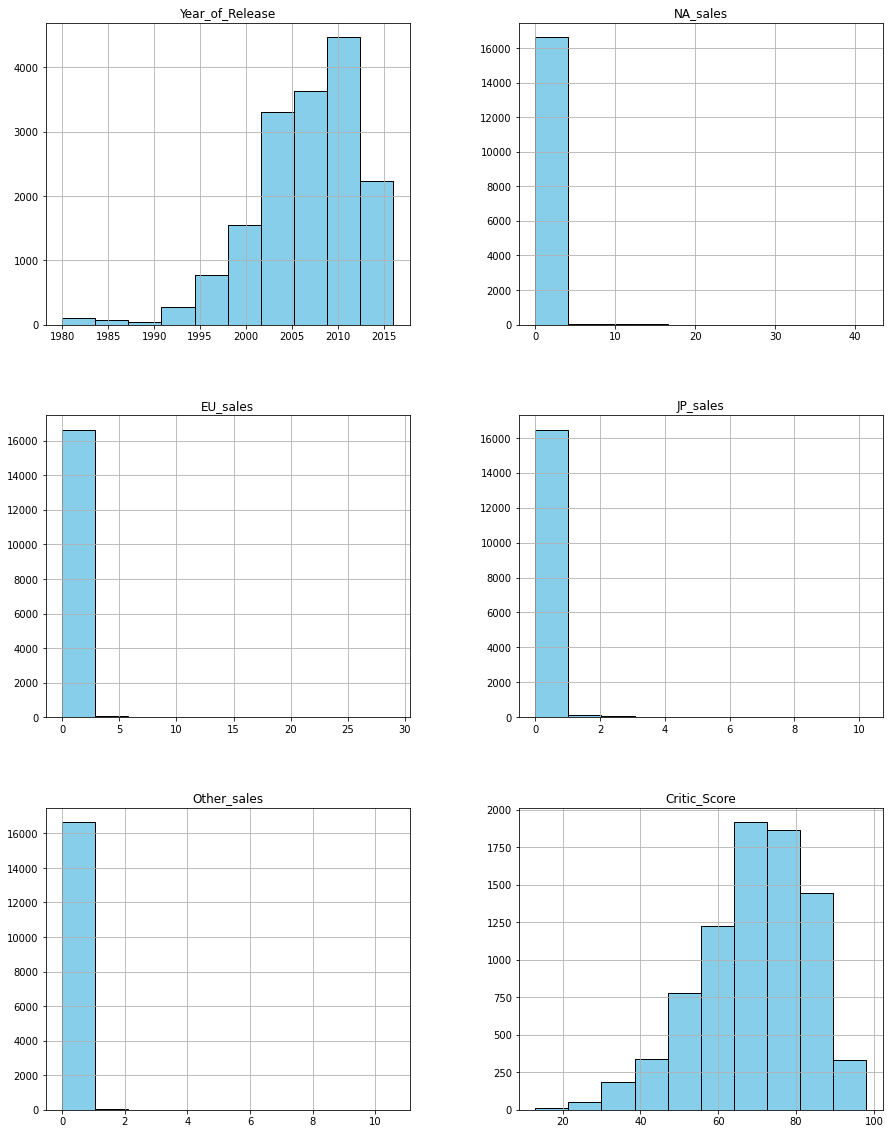

In [5]:
data.hist(
    figsize=(15, 20),
    color='skyblue',  
    edgecolor='black'
)
plt.show()

In [6]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [7]:
data.columns = data.columns.str.lower()

In [8]:
data.columns 

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [9]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [11]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [12]:
#удалим пропуски с годом выпуска. Иначе в дальнейшем мы получим нули. Значений не много ими можно пренебречь. 
data = data.dropna(subset=['year_of_release'])

In [13]:
# Заменим в этих столбцах тип данных:
data['year_of_release'] = data['year_of_release'].fillna(0).astype(int)
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [14]:
# Посмотрим что по пропускам
data.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         8983
rating             6678
dtype: int64

In [15]:
# имя / жанр удаляем без сожаления, ими можно пренебречь
data = data.dropna(subset=['name', 'genre'])

In [16]:
#Рейтинг - это возрастные ограничения. Ими нельзя принебречь, заполним значением, которое даст понять,
#что категория не была проставлена.

data['rating'].fillna('Not Rated', inplace=True)

In [17]:
# Далее я хочу просмотреть, нет ли нулевых значений, что бы возможно заменить NaN на нули.
data[data['critic_score'] == 0] 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [18]:
# Тут анналогично
data[data['user_score'] == 0] 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2835,My Little Pony: Pinkie Pie's Party,DS,2008,Adventure,0.66,0.0,0.0,0.06,NaN,0.0,E


In [19]:
#И тут
data[data['rating'] == 0] 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [20]:
# Подумал, что NaN общую статистику не испортит. А нули - будут явными выбросами. Поэтому отказался от идеи замены. 

In [21]:
data.duplicated().sum()

0

In [22]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

In [23]:
data['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [24]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [25]:
data['total_sales'] = data.loc[:,['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Not Rated,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Not Rated,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,Not Rated,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,Not Rated,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Not Rated,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,Not Rated,0.01


In [35]:
#data.duplicated(subset = ['name']).sum()
#добавим еще один столбец. Можно было добавить год релиза, но я посчитал, что на разных платформах игра 
# могла выйти в конце одного и начале другого года. Поэтому выведем и посмотрим:
data.duplicated(subset=['name', 'platform']).sum()
data[data.duplicated(subset=['name', 'platform']]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E,2.56
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T,1.56
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T,1.25
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T,0.29
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T,0.08
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E,0.01


In [36]:
data = data.drop_duplicates(subset=['name', 'platform'])


In [37]:
data.duplicated(subset=['name', 'platform']).sum()


0

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


### Вывод по разделу. Что было сделано:
- загружены необходимые для работы библиотеки.
- загружен датасет.
- ознакомились с данными.
- привели названия столбцов к нижнему регистру(snake_style был уже)
- в столбцах year_of_release и user_score поменяли тип данных. В первом случае это год выхода, это только целое число. Во втором случае - оценки пользователя это число. 
- Убрали дубликаты, убрали пропуски там, где это было возможно.
- Добавили столбик с суммарными продажами. 

## Исследовательский анализ данных


### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?


In [88]:
game_years = pd.pivot_table(data, index='year_of_release', values='name', aggfunc='count')
game_years

,name
year_of_release,
1980,8
1981,43
1982,33
1983,16
1984,13
1985,13
1986,21
1987,15
1988,11


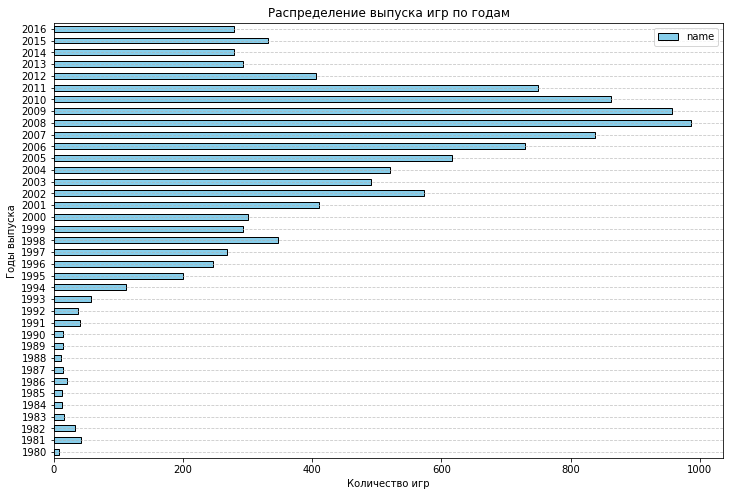

In [89]:
game_years.plot(
    kind='barh',  
    figsize=(12, 8), 
    color='skyblue',  
    edgecolor='black',
    title='Распределение выпуска игр по годам'  
)
plt.xlabel('Количество игр')  
plt.ylabel('Годы выпуска')  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()

#### Вывод: виден практически линейный рост до 2009 года и потом снижение. Я предполагаю, что постепенный рост был связан с развитием технологий, а дальнейший спад с селекцией бизнеса: крупные игроки подмяли под себя рынок, вывели игры на более качественный уровень, однако увеличили их сроки разработки. Возможно, что рынок изменился настолько, что все что было до 1995-2000 можно не учитывать. Но это предположение, посмотрим дальше на данные.

### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [90]:
sales_by_platform = pd.pivot_table(
    data,
    index = ['platform'],
    values=['total_sales'], 
    aggfunc=['sum']
).sort_values(('sum', 'total_sales'),ascending = False)


In [91]:
sales_by_platform

,sum
,total_sales
platform,
PS2,1121.07
Wii,769.65
PS,697.10
DS,690.89
X360,569.68
PS3,524.88
PS4,255.01
GBA,242.69


##### Видно что сумма продаж первых 6 позиций доминирует. Можно предположить, что это лидеры рынка, прошедший полный цикл популярности. На основании их данных можно будет предположить средний срок жизни платформы.

In [92]:
#Построим графики распредления продаж по годам по каждой платформе. Сначала соберем список топ 6:
top6 = sales_by_platform.reset_index().head(6)['platform'].tolist()
top6


['PS2', 'Wii', 'PS', 'DS', 'X360', 'PS3']

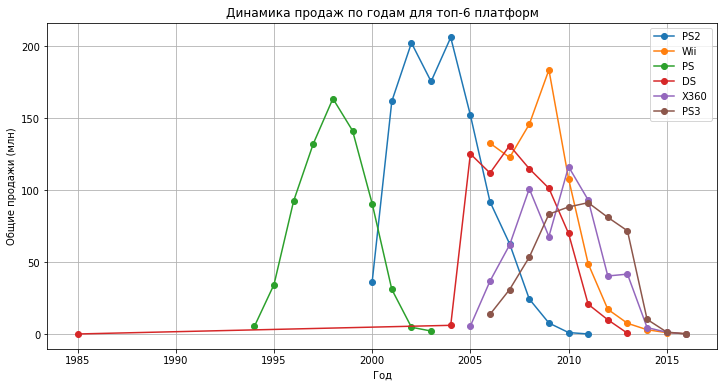

In [93]:
plt.figure(figsize=(12, 6))

# Перебираем топ-6 платформ и строим графики
for platform in top6:
    yearly_sales = data.loc[data['platform'] == platform].groupby('year_of_release')['total_sales'].sum()
    plt.plot(yearly_sales.index, yearly_sales.values, label=platform, marker='o')

plt.title('Динамика продаж по годам для топ-6 платформ')
plt.xlabel('Год')
plt.ylabel('Общие продажи (млн)')
plt.legend()
plt.grid(True)

plt.show()


In [105]:
data.query('platform == "DS"').sort_values(by='year_of_release')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.00,0.00,0.02,0.00,NaN,NaN,Not Rated,0.02
14087,Mahjong Taikai,DS,2004,Misc,0.00,0.00,0.04,0.00,NaN,NaN,Not Rated,0.04
10940,Puyo Pop Fever (JP sales),DS,2004,Puzzle,0.00,0.00,0.09,0.00,NaN,NaN,Not Rated,0.09
2668,Pokemon Dash,DS,2004,Racing,0.21,0.14,0.38,0.04,46.0,5.9,E,0.77
691,WarioWare Touched!,DS,2004,Puzzle,0.51,0.45,1.21,0.13,NaN,NaN,Not Rated,2.30
...,...,...,...,...,...,...,...,...,...,...,...,...
16296,Hakuoki: Reimeiroku DS,DS,2012,Action,0.00,0.00,0.01,0.00,NaN,NaN,Not Rated,0.01
7993,The Smurfs 2,DS,2013,Platform,0.00,0.17,0.00,0.01,NaN,NaN,E,0.18
9753,Moshi Monsters: Katsuma Unleashed,DS,2013,Action,0.00,0.11,0.00,0.01,NaN,NaN,E,0.12
7460,Disney's Planes,DS,2013,Simulation,0.11,0.08,0.00,0.02,NaN,NaN,E,0.21


##### По графику виидно, что есть какой-то выброс с платформой DS, им можно принебречь. Для остальных случаев - жизненный цикл платформы ± 10 лет.  Причем все платформы, который заработали больше всего уже находятся на стадии падения. Поэтому нет смысла их анализировать на перспективу продаж нашего магазина.  Исходя из данных, нам нужны платформы на пике и на старте : это 5 лет.


### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы.


In [106]:
actual_data = data.query('year_of_release >= 2012')
actual_data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Not Rated,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,Not Rated,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,Not Rated,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
62,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.90
66,Halo 4,X360,2012,Shooter,6.65,2.28,0.04,0.74,87.0,7.0,M,9.71
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,Not Rated,9.18
73,Animal Crossing: New Leaf,3DS,2012,Simulation,2.03,2.36,4.39,0.39,88.0,8.7,E,9.17


### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.



In [107]:
sales_actual = actual_data.pivot_table(
    index = ['platform'],
    values = ['total_sales'],
    aggfunc =  ['sum'])
sales_actual.sort_values(('sum', 'total_sales'),ascending = False)

,sum
,total_sales
platform,
PS4,255.01
3DS,177.01
PS3,164.26
X360,87.64
WiiU,53.95
XOne,31.82
Wii,28.68
PC,28.49


In [109]:
actual_platform_list = sales_actual.reset_index()['platform'].tolist()
actual_platform_list

['3DS', 'DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']

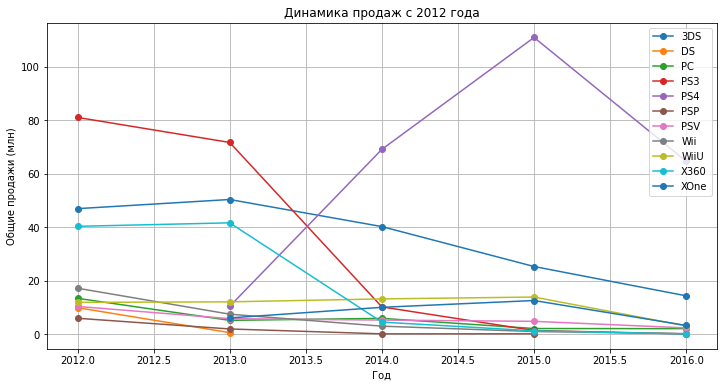

In [110]:
# Строим анналогичный график но по последним данным, что бы понять кто на какой стадии:
plt.figure(figsize=(12, 6))

# Перебираем топ-6 платформ и строим графики
for platform in actual_platform_list:
    yearly_sales = actual_data.loc[data['platform'] == platform].groupby('year_of_release')['total_sales'].sum()
    plt.plot(yearly_sales.index, yearly_sales.values, label=platform, marker='o')

plt.title('Динамика продаж с 2012 года')
plt.xlabel('Год')
plt.ylabel('Общие продажи (млн)')
plt.legend()
plt.grid(True)

plt.show()

#### Вывод: Кажется можно отсечь платформы: DS & PSP, так как их прдажи закончились, посмотрим на цифры:

In [127]:
current_period_sales = pd.pivot_table(actual_data, index=['platform','year_of_release'], 
                                     values='total_sales', aggfunc = 'sum')

current_period_sales

total_sales
platform year_of_release             
3DS      2012                   46.91
         2013                   50.33
         2014                   40.20
         2015                   25.27
         2016                   14.30
DS       2012                    9.88
         2013                    0.54
PC       2012                   13.37
         2013                    5.13
         2014                    5.88
         2015                    2.08
         2016                    2.03
PS3      2012                   81.03
         2013                   71.67
         2014                   10.16
         2015                    1.34
         2016                    0.06
PS4      2013                   10.38
         2014                   69.08
         2015                  110.93
         2016                   64.62
PSP      2012                    5.91
         2013                    1.91
         2014                    0.09
         2015                    0.10
PSV      2012                   10.34
         2013                    5.77
         2014                    5.23
         2015                    4.77
         2016                    2.31
Wii      2012                   17.15
         2013                    7.44
         2014                    2.96
         2015                    0.95
         2016                    0.18
WiiU     2012                   11.85
         2013                   12.06
         2014                   13.16
         2015                   13.85
         2016                    3.03
X360     2012                   40.30
         2013                   41.60
         2014                    4.48
         2015                    1.22
         2016                    0.04
XOne     2013                    6.04
         2014                   10.01
         2015                   12.55
         2016                    3.22

####  Так и есть, отсекаем DS, PSP, X360,Wii. У первых двух вообще нет продаж, у  X360 и Wii есть более новые модели, которые перехватили инициативу на рынке. Итоговый список будет состоять из 7 платформ:

In [112]:
actual_platform_list = ['3DS', 'PC', 'PS3', 'PS4', 'PSV',  'WiiU', 'XOne']

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

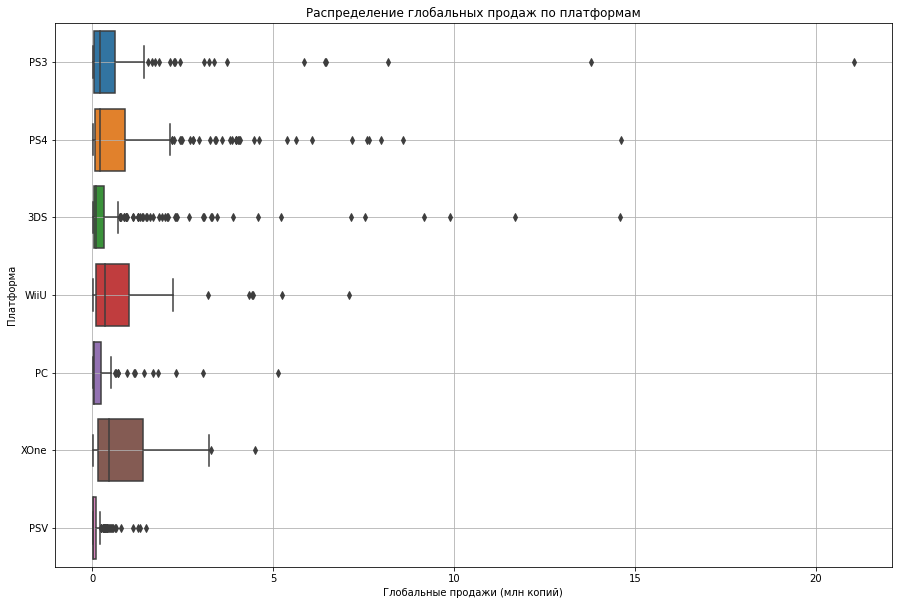

In [113]:
plt.figure(figsize=(15, 10))
sns.boxplot(
    x="total_sales",
    y="platform",
    data=actual_data[actual_data['platform'].isin(actual_platform_list)]
)

plt.title("Распределение глобальных продаж по платформам")
plt.xlabel("Глобальные продажи (млн копий)")
plt.ylabel("Платформа")
plt.grid(True)
plt.show()


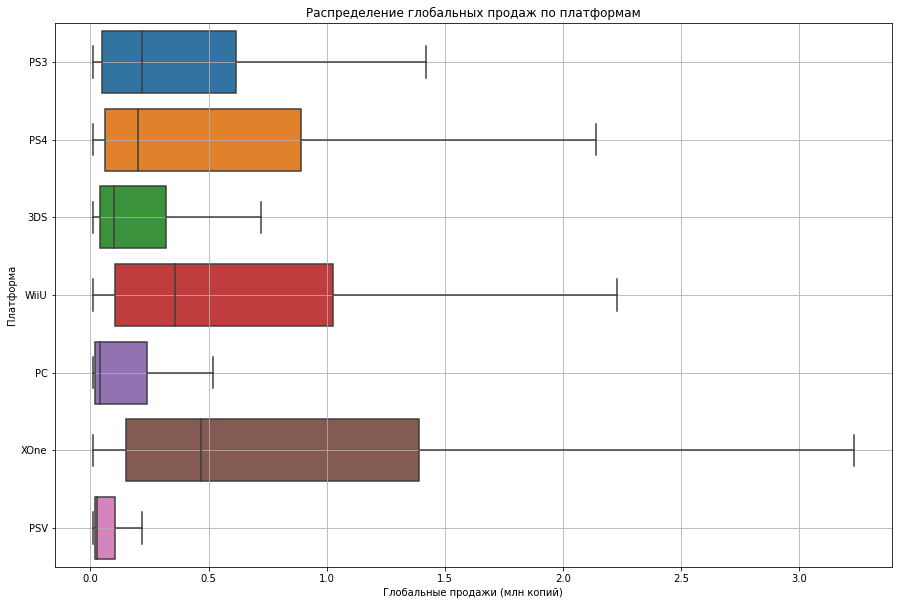

In [114]:
# С учетом выбросов вышло криво, посмотрим без них:
plt.figure(figsize=(15, 10))
sns.boxplot(
    x="total_sales",
    y="platform",
    showfliers=False,
    data=actual_data[actual_data['platform'].isin(actual_platform_list)]
)

plt.title("Распределение глобальных продаж по платформам")
plt.xlabel("Глобальные продажи (млн копий)")
plt.ylabel("Платформа")
plt.grid(True)
plt.show()




#### Вывод:  Самый большой выброс по продажам одной игры у PS3, более 20 млн копий. Уверенную долю рынка занимают PS4, X0ne, PS3, WiiU. 

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Корреляция между оценками пользователей и продажами по платформе PS4  = -0.053395650308599905


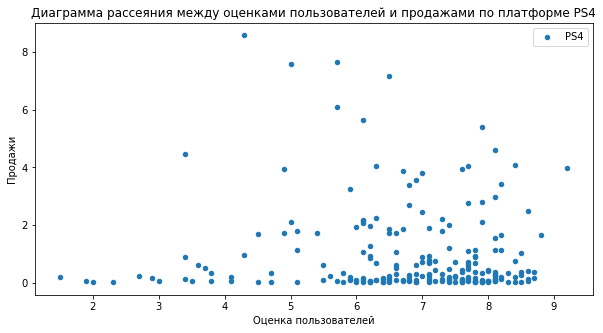

Корреляция между оценками пользователей и продажами по платформе XOne  = 0.09923469220745382


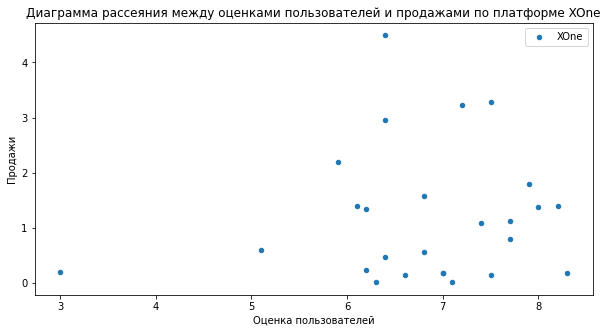

Корреляция между оценками пользователей и продажами по платформе PS3  = 0.02351166507817631


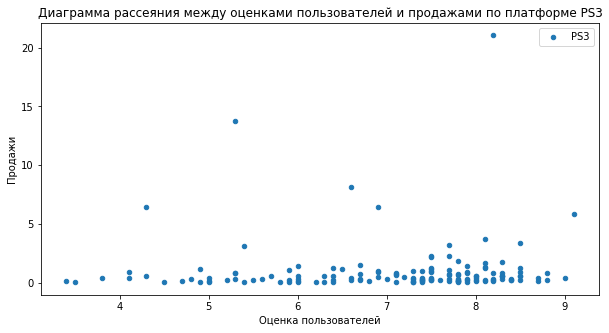

Корреляция между оценками пользователей и продажами по платформе WiiU  = 0.4517548555282536


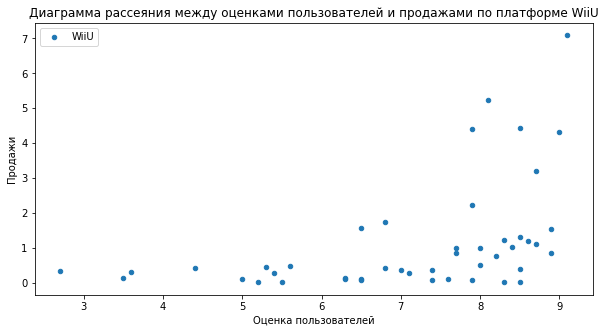

In [115]:
# Будем смотреть на наш топ4 как на самые современные. Построим графики корреляций: 
top4 = ['PS4', 'XOne', 'PS3', 'WiiU']
for top in top4:
    (
     actual_data.query('platform == @top')
        .plot(x='user_score', 
          y='total_sales', 
          kind='scatter', 
          figsize=(10, 5))
    )
    plt.title(f'Диаграмма рассеяния между оценками пользователей и продажами по платформе {top}')
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Продажи')
    plt.legend([top])
    print(f'Корреляция между оценками пользователей и продажами по платформе {top}  =', actual_data.query('platform == @top')['user_score'].corr(actual_data.query('platform == @top')['total_sales']))
    plt.show()



#### Вывод по корреляции оценки пользователей и продажам:  слабая прослеживается только по платформе  WiiU( Коэффицент Пирсона = 0.4) . Посмотрим  корреляцию с оценками критиков:

Корреляция между оценками критиков и продажами по платформе PS4  = 0.41895932005956243


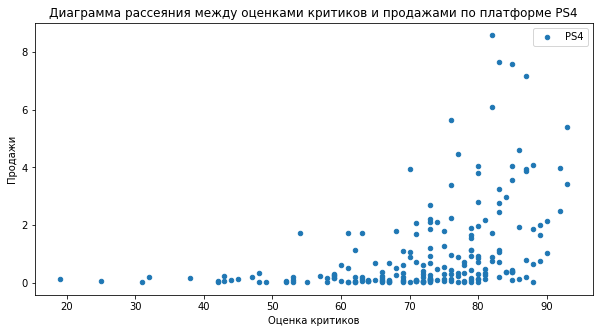

Корреляция между оценками критиков и продажами по платформе XOne  = 0.518353739512983


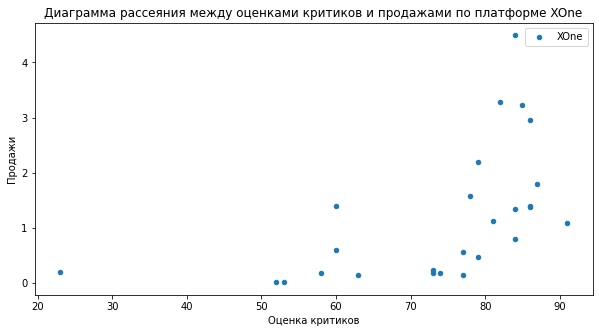

Корреляция между оценками критиков и продажами по платформе PS3  = 0.3998081861076079


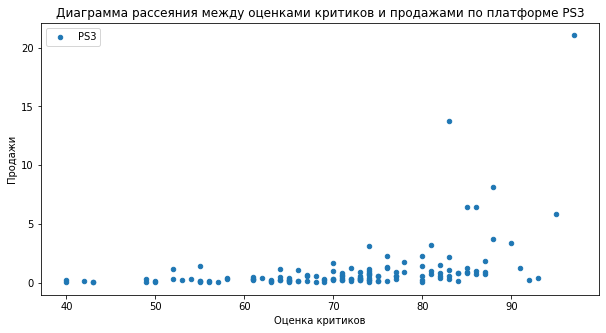

Корреляция между оценками критиков и продажами по платформе WiiU  = 0.4379749166503039


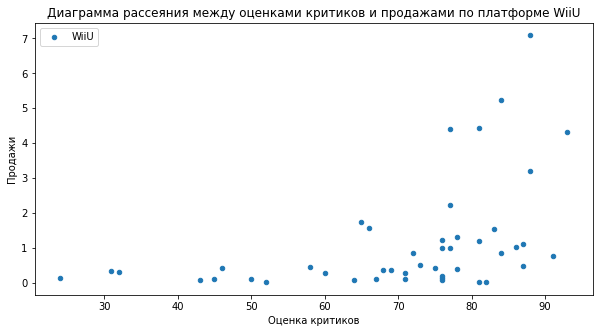

In [116]:
for top in top4:
    (
     actual_data.query('platform == @top')
        .plot(x='critic_score', 
          y='total_sales', 
          kind='scatter', 
          figsize=(10, 5))
    )
    plt.title(f'Диаграмма рассеяния между оценками критиков и продажами по платформе {top}')
    plt.xlabel('Оценка критиков')
    plt.ylabel('Продажи')
    plt.legend([top])
    print(f'Корреляция между оценками критиков и продажами по платформе {top}  =', actual_data.query('platform == @top')['critic_score'].corr(actual_data.query('platform == @top')['total_sales']))
    plt.show()

#### Вывод: тут и визуально, и по числам  присутствует небольшая корреляция. В PS3 / Wiiu коэффицент Пирсона в районе 0.33-0.34. У PS4 / XOne в районе 0.40-0.41. 

#### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

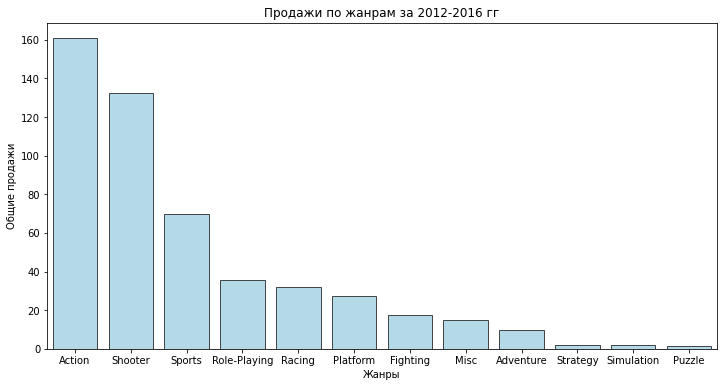

In [117]:
# соберем таблицу и построим график сначала по топовым платформам
genre_actual = (
    actual_data
    .query('platform in ["PS4", "XOne", "PS3", "WiiU"]')
    .pivot_table(index='genre', values='total_sales', aggfunc='sum')
    .sort_values('total_sales', ascending=False)
)

plt.figure(figsize=(12, 6))
(sns.barplot(data = genre_actual, x = genre_actual.index, y = 'total_sales', color = 'skyblue',edgecolor='black', 
    alpha=0.7)
    .set(title = 'Продажи по жанрам за 2012-2016 гг', xlabel = 'Жанры', ylabel = 'Общие продажи'))

plt.show()

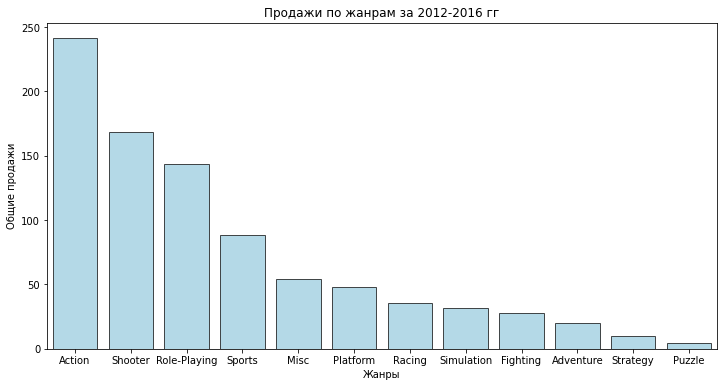

In [118]:
# и по всем платформам
genre_actual = (
    actual_data
    .pivot_table(index='genre', values='total_sales', aggfunc='sum')
    .sort_values('total_sales', ascending=False)
)

plt.figure(figsize=(12, 6))
(sns.barplot(data = genre_actual, x = genre_actual.index, y = 'total_sales', color = 'skyblue',edgecolor='black', 
    alpha=0.7)
    .set(title = 'Продажи по жанрам за 2012-2016 гг', xlabel = 'Жанры', ylabel = 'Общие продажи'))

plt.show()

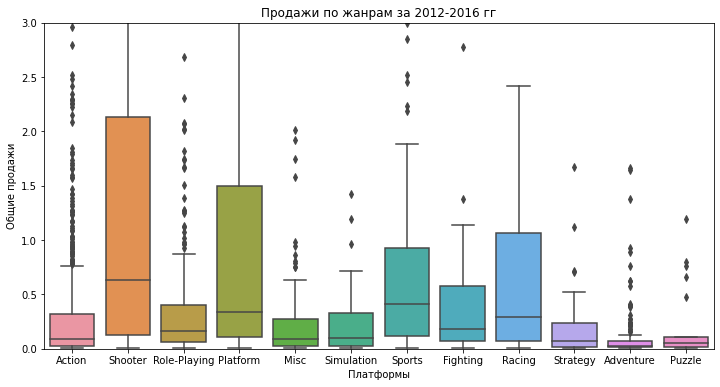

In [119]:
plt.figure(figsize=(12, 6))
(sns.boxplot(data = actual_data, y = 'total_sales', x='genre')
    .set(title = 'Продажи по жанрам за 2012-2016 гг', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 3)))

plt.show() 

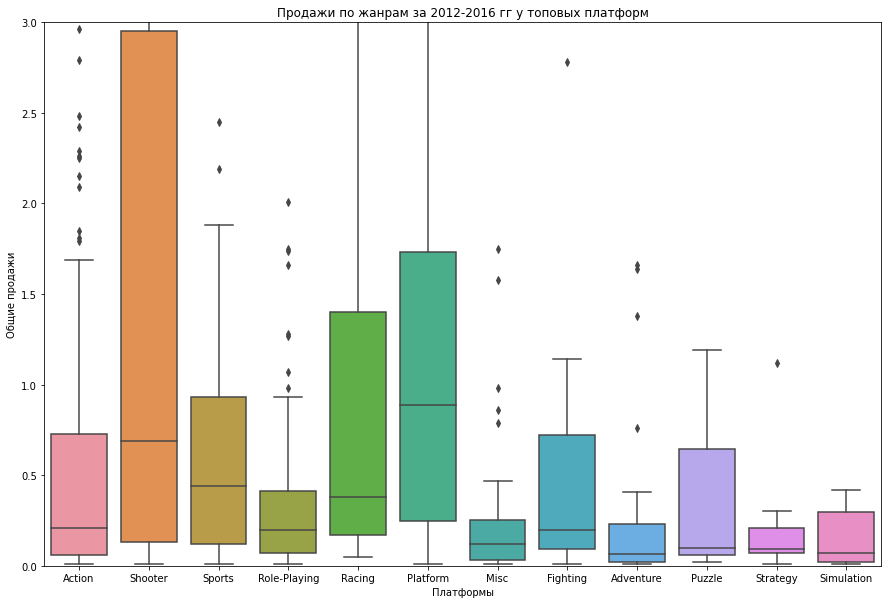

In [120]:
plt.figure(figsize=(15, 10))
(sns.boxplot(data = actual_data
    .query('platform in ["PS4", "XOne", "PS3", "WiiU"]'), y = 'total_sales', x='genre')
    .set(title = 'Продажи по жанрам за 2012-2016 гг у топовых платформ', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 3)))

plt.show() 

#### Вывод: Что у топовых платформ, что у всех за актуальный период времени очень стабильная медана у шутеров.При этом большие значения за медианой часто наблюдаются у жанра экшн и спорт и платформы. 

## Составьте портрет пользователя каждого региона



### Определите для пользователя каждого региона (NA, EU, JP):

### Самые популярные платформы (топ-5). Опишите различия в долях продаж.


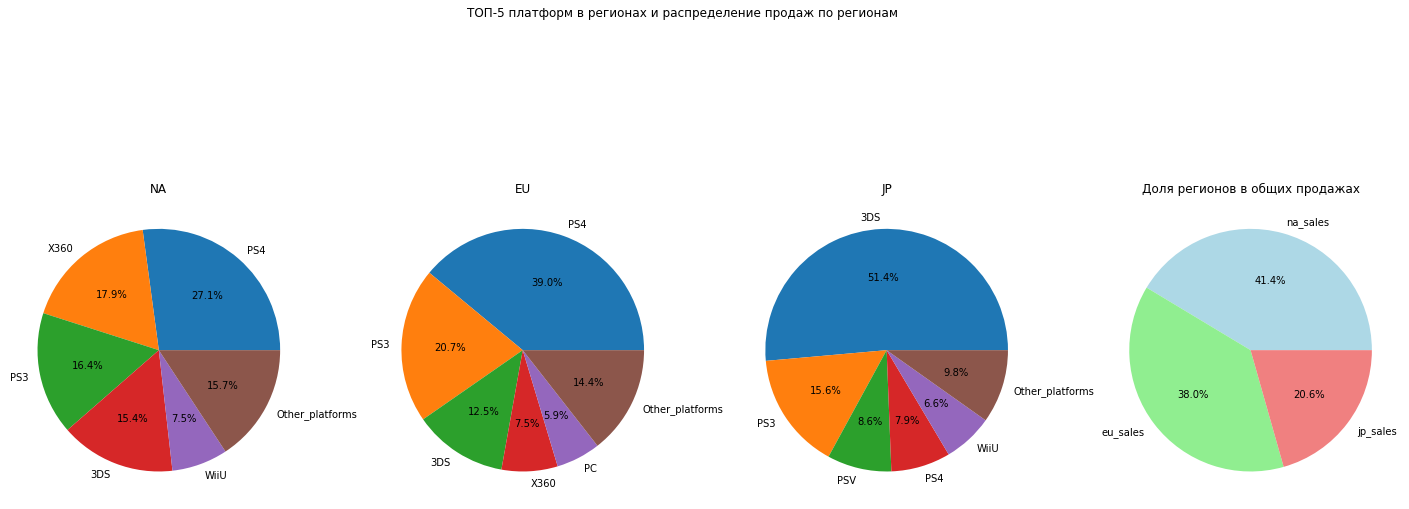

In [121]:
# срежем регионы: Северная Америка, Европа, Япония. 
regions = actual_data.columns[4:7]

# Создаем 4 графика, по каждому региону + распределение всех продаж среди регионов7]
fig, axs = plt.subplots(1, 4, figsize=(25, 10))  
fig.suptitle('ТОП-5 платформ в регионах и распределение продаж по регионам')

# Перебираем три региона и строим круговые диаграммы по платформам
for i in range(3):
    # Берем 5 самых продающих платформ в регионе
    df_i = (actual_data.groupby('platform')[regions[i]].sum()
               .reset_index()
               .sort_values(regions[i], ascending=False, ignore_index=True)
               .head(5))
    
    # Все остальные продажи отнесем в категорию 'Other_platforms'
    df_i = df_i.append({'platform': 'Other_platforms', regions[i]: actual_data[regions[i]].sum() - df_i[regions[i]].sum()}, 
                        ignore_index=True)
    
    # Строим круговую диаграмму
    axs[i].pie(df_i[regions[i]], labels=df_i['platform'], autopct='%1.1f%%')
    axs[i].set_title(df_i.columns[1].split('_')[0].upper())

# Добавляем общий график распределения продаж по регионам
total_sales_by_region = actual_data[regions].sum()  # Считаем сумму продаж по каждому региону
axs[3].pie(total_sales_by_region, labels=total_sales_by_region.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'])
axs[3].set_title('Доля регионов в общих продажах')

plt.show()


 #### Вывод: За выбранный нами период( 5 лет), видны сущетсвенные  различия на каждом рынке: На рынке Северной Америке почти 1/4 рынка за X360, чуть меньше за PS4, далее PS3. При этом доля Северной Америки от общего рынка 45,8%. В Европе же тройка лидеров наоборот: Ps4,Ps3,X360 и доля рынка 39,3. В Японии почти половину рынка(45,6%) занимает 3DS, следом PS3 с 18,3% и потом PSV с 10,9, при этом доля от общего рынка самая малая и составляет 14,9%.

###  Самые популярные жанры (топ-5). Поясните разницу.


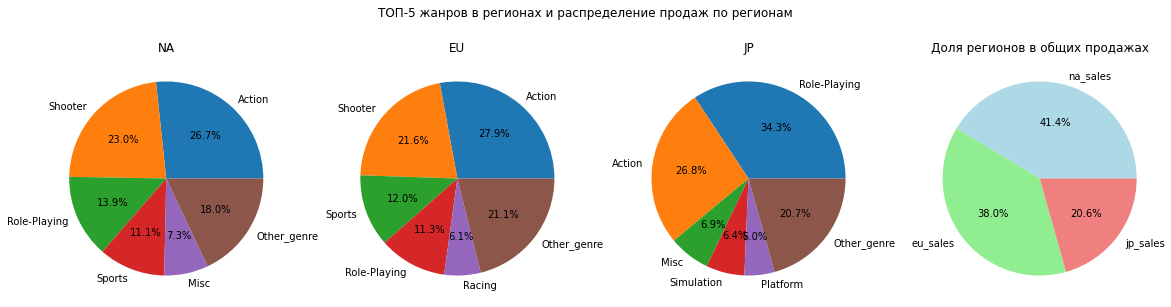

In [122]:
# Все то же самое
fig, axs = plt.subplots(1, 4, figsize=(20, 5))  
fig.suptitle('ТОП-5 жанров в регионах и распределение продаж по регионам')

# Перебираем три региона и строим круговые диаграммы по жанрам
for i in range(3):
    # Берем 5 самых продающих жанров в регионе
    df_i = (actual_data.groupby('genre')[regions[i]].sum()
               .reset_index()
               .sort_values(regions[i], ascending=False, ignore_index=True)
               .head(5))
    
    # Все остальные продажи отнесем в категорию 'Other_genre'
    df_i = df_i.append({'genre': 'Other_genre', regions[i]: actual_data[regions[i]].sum() - df_i[regions[i]].sum()}, 
                        ignore_index=True)
    
    # Строим круговую диаграмму
    axs[i].pie(df_i[regions[i]], labels=df_i['genre'], autopct='%1.1f%%')
    axs[i].set_title(df_i.columns[1].split('_')[0].upper())

# Добавляем общий график распределения продаж по регионам
total_sales_by_region = actual_data[regions].sum()  # Считаем сумму продаж по каждому региону
axs[3].pie(total_sales_by_region, labels=total_sales_by_region.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'])
axs[3].set_title('Доля регионов в общих продажах')

plt.show()


#### В Северной Америке и Европе 1/2/3место уверенно за жанрами Action/Shooter/ Sports. Япония же и тут отличается: 1 место Role-Playing, 2ое - action, явного третьего места нет, так как 21,6% занимает сборка из остальных жанров, не попавших в топ 5. 

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [123]:
# Вспомним что у нас есть за рейтинги
actual_data['rating'].unique()

array(['M', 'Not Rated', 'E', 'E10+', 'T'], dtype=object)

####  Что они значат? 
- M - Mature 17+
- E - Everyone
- E10+ - Everyone 10+
- T - Teen (13 years)

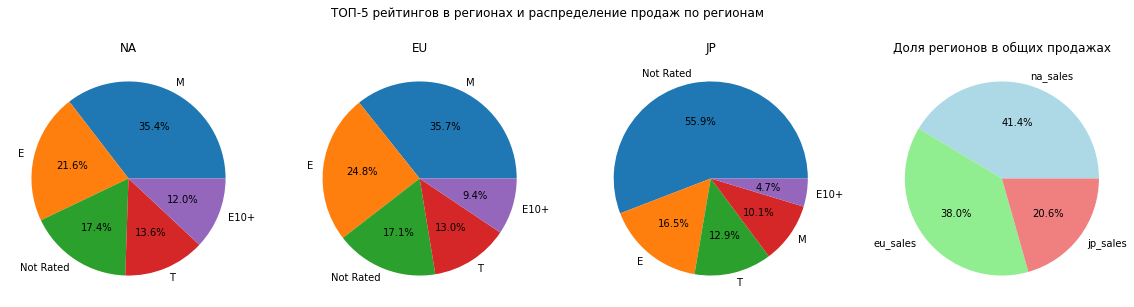

In [124]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))  
fig.suptitle('ТОП-5 рейтингов в регионах и распределение продаж по регионам')

# Перебираем три региона и строим круговые диаграммы по рейтингам
for i in range(3):
    # Берем 5 самых популярных рейтингов в регионе
    df_i = (actual_data.groupby('rating')[regions[i]].sum()
               .reset_index()
               .sort_values(regions[i], ascending=False, ignore_index=True)
               .head(5))
    
    # Строим круговую диаграмму
    axs[i].pie(df_i[regions[i]], labels=df_i['rating'], autopct='%1.1f%%')
    axs[i].set_title(df_i.columns[1].split('_')[0].upper())

# Добавляем общий график распределения продаж по регионам
total_sales_by_region = actual_data[regions].sum()  # Считаем сумму продаж по каждому региону
axs[3].pie(total_sales_by_region, labels=total_sales_by_region.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'])
axs[3].set_title('Доля регионов в общих продажах')

plt.show()

#### В Северной Америке и Европе лидируют продажи игр с рейтингом 17+, на втором же месте игры с рейтингом 'для всех'. Япония и в этом случае отличается: %гры с возрастным ограничением 17+ у них занимают 11%, а большую популярность имеют игры вообще без рейтинга. Компания занимающаяся оценкой - Entertainment Software Rating Board (ESRB) получает запрос от издателя, следовательно, можно предположить, что в Японии сильно развит внутренний игровой рынок, без выхода на "Мир".

## Проверьте гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Зададим нулевую и альтернативные гипотезы:
 - **Нулевая гипотеза (H0)**: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
 - **Альтерантивная гипотеза** (H1): Средние пользовательские рейтинги платформ Xbox One и PC различаются.
 
 Пороговое значение = 0.05
 Пороговое значение выбрано из двух общепринятых 0.01 и 0.05, так как не требуется высокая точность. 
 
 Наши выборки независимы, поэтому мы будетиспользовать t-критерий Стьюдента. 
  И двухсторонний тест.

In [125]:
results = st.ttest_ind(
    actual_data.loc[actual_data['platform'] == 'XOne', 'user_score'].dropna(),
    actual_data.loc[actual_data['platform'] == 'PC', 'user_score'].dropna(),
    equal_var=False,
    alternative='two-sided'
)

print(f'p-value  равно: {results.pvalue}')
if results.pvalue < .05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value  равно: 0.5998873261719986
Не получилось отвергнуть нулевую гипотезу


####  Вывод: На основании исследования мы не можем утверждать, что средние пользовательские рейтинги платформ Xbox One и PC различаются

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

 - **Нулевая гипотеза (H0)**: Средние пользовательские рейтинги жанров Action и Sports одинаковые.
 - **Альтерантивная гипотеза (H1)**: Средние пользовательские рейтинги жанров Action и Sports различаются.
 
 Пороговое значение = 0.05
 Пороговое значение выбрано из двух общепринятых 0.01 и 0.05, так как не требуется высокая точность. 
 
 Наши выборки независимы, поэтому мы будетиспользовать t-критерий Стьюдента. 
 И двухсторонний тест.

In [126]:
results = st.ttest_ind(
    actual_data.loc[actual_data['genre'] == 'Action', 'user_score'].dropna(),
    actual_data.loc[actual_data['genre'] == 'Sports', 'user_score'].dropna(),
    equal_var=False,
    alternative='two-sided'
)

print(results.pvalue)
if results.pvalue < .05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую минуту')

1.214134289177593e-07
Отвергаем нулевую гипотезу


####  Вывод: На основании исследования мы не можем утверждать, что средние пользовательские рейтинги платформ Xbox One и PC различаются

## Общий вывод

### Мы проделали следующую работу:
- загружены необходимые для работы библиотеки.
- загружен датасет
- ознакомились с данными 
- привели названия столбцов к нижнему регистру(snake_style был уже)
- в столбцах year_of_release и user_score поменяли тип данных. В первом случае это год выхода, это только целое число. Во втором случае - оценки пользователя это число
- Убрали дубликаты, убрали пропуски там, где это было возможно
- Добавили столбик с суммарными продажами

### Исследовали данные и сделали следующие выводы:
-  Виден практически линейный рост количества выпускаемых игр до 2009 года и потом снижение. Я предполагаю, что постепенный рост был связан с развитием технологий, а дальнейший спад с селекцией бизнеса: крупные игроки подмяли под себя рынок, вывели игры на более качественный уровень, однако увеличили их сроки разработки. Возможно, что рынок изменился настолько, что все что было до 1995-2000 можно не учитывать. Но это предположение, посмотрим дальше на данные.
- Далее мы определили топ6 лидеров рынка за все время, это платформы: PS2, X360, PS3, Wii, DS, PS. 
- Посмотрели график распредления продаж,и определили - жизненный цикл платформы ± 10 лет. Причем все платформы, который заработали больше всего уже находятся на стадии падения на текущий момент. Поэтому нет смысла их анализировать на перспективу продаж нашего магазина. Исходя из данных, нам нужны платформы на пике и на старте : это 5 лет.¶ Этот тайминг выбрали за актуальный - с 2012 по 20167 
- Далее посмотрели графики распределения продаж игр на платформы по годам, отсекли часть и вывели 7 актуальных платформ.
- Все дальнейшие анализы производили по этим 7 платформам и актуальному таймингу.
- Посмотрели корреляцию между оценками пользователей и продажами, получили небольшую корреляцию только по платформе WiiU( Коэффицент Пирсона = 0.4)
- Посмотрели корреляцию между оценками критиков и продажами, и увидели визуально, и по числам присутствует небольшая корреляция. В PS3 / Wiiu коэффицент Пирсона в районе 0.33-0.34. У PS4 / XOne в районе 0.40-0.41.
- Посмотрели графики по жанрами и сделали вывод: Что у выбранных нами топовых платформ, что у всех за актуальный период времени очень стабильная медана у шутеров.При этом большие значения за медианой часто наблюдаются у жанра экшн и спорт и платформы.


 ### Далее составили  портрет пользователя каждого региона

#### За выбранный нами период( 5 лет), видны сущетсвенные различия на каждом рынке: На рынке Северной Америке почти 1/4 рынка за X360, чуть меньше за PS4, далее PS3. При этом доля Северной Америки от общего рынка 45,8%. В Европе же тройка лидеров наоборот: Ps4,Ps3,X360 и доля рынка 39,3. В Японии почти половину рынка(45,6%) занимает 3DS, следом PS3 с 18,3% и потом PSV с 10,9, при этом доля от общего рынка самая малая и составляет 14,9%.



#### В Северной Америке и Европе 1/2/3место уверенно за жанрами Action/Shooter/ Sports. Япония же и тут отличается: 1 место Role-Playing, 2ое - action, явного третьего места нет, так как 21,6% занимает сборка из остальных жанров, не попавших в топ 5. 

#### В Северной Америке и Европе лидируют продажи игр с рейтингом 17+, на втором же месте игры с рейтингом 'для всех'. Япония и в этом случае отличается: %гры с возрастным ограничением 17+ у них занимают 11%, а большую популярность имеют игры вообще без рейтинга. Компания занимающаяся оценкой - Entertainment Software Rating Board (ESRB) получает запрос от издателя, следовательно, можно предположить, что в Японии сильно развит внутренний игровой рынок, без выхода на "Мир".

#### Как вывод по этому разделу: Наш целевой покупатель это Северо-Американец или Европеец. У него либо X360, либо PS3,PS4. Он предпочитает Action / Shooter или Sports. При этом он либо играет либо с возрастным ограничением 17+, либо в игры для всех (E - Everyone).  Если наш покупатель японец, то надо ориентироваться на платформу 3DS и жанры Role-Playing или action. Рейтинг ESRB в Японии судя по всему не котируется, так как там 56%

### Проверка гипотез. 

#### У нас было два запроса от коллег:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разны

#### По первой мы вывели:
Нулевая гипотеза (H0): Средние пользовательские рейтинги жанров Action и Sports одинаковые.

Альтерантивная гипотеза (H1): Средние пользовательские рейтинги жанров Action и Sports различаются.

Пороговое значение = 0.05 Пороговое значение выбрано из двух общепринятых 0.01 и 0.05, так как не требуется высокая точность.

Наши выборки независимы, поэтому мы использовали t-критерий Стьюдента. И двухсторонний тест.

Получили p-value  равное: 0.5489537965134912

Как итог: На основании исследования мы не можем утверждать, что средние пользовательские рейтинги платформ Xbox One и PC различаются


#### По второй:
Нулевая гипотеза (H0): Средние пользовательские рейтинги жанров Action и Sports одинаковые.

Альтерантивная гипотеза (H1): Средние пользовательские рейтинги жанров Action и Sports различаются.

Пороговое значение = 0.05 Пороговое значение выбрано из двух общепринятых 0.01 и 0.05, так как не требуется высокая точность.

Наши выборки независимы, поэтому мы использовали t-критерий Стьюдента. И двухсторонний тест.


Получили:p-value  равно: 4.24307776572644e-20
Это очень маленькое значение, поэтому на основании исследования мы не можем утверждать, что средние пользовательские рейтинги платформ Xbox One и PC различаются

### Мой вывод: 


#### В рамках планирования на 2017-ый год, если рассуждать с позиции магазина продающего игры по всему миру:   

##### Наш покупатель в Северной Америке:
- Использует чаще всего X360, чуть реже PS4, и на третьем месте PS3.
- Играет в Action/Shooter/ Sports
- Предпочитает игры с рейтингом М(17+) или E(evryone).

##### Наш покупатель в Европе
- Использует Ps4,Ps3,X360 
- Играет в Action/Shooter/ Sports
- Предпочитает игры с рейтингом М(17+) или E(evryone).

##### Наш покупатель в Японии 
- Использует чаще всего: 3DS, следом PS3 с 18,3% и потом PSV 
- Играет чаще всего в Role-Playing, 2ое место - action, явного третьего места нет, так как 21,6% занимает сборка из остальных жанров, не попавших в топ 5
- Более 56% рынка игр там без рейтинга ESRB. 

Добольнительно стоит взять во внимание, что рынок продаж в Японии составляет 20% от общего, тогда как Северная Америка и Европа делят его соответсвенно 41% и 39%, именно в такой пропроции следует распределять рекламный бюджет и учитывать портрет описанный выше.